#### Neural networks
##### Phases

     - Loading libraries
     - Loading datasets
     - Data visualization
     - Target construction & encoding the target to one hot vectors!
     - Reshaping
     - Defining the Model
     - Data augmentation
     - Fit and predict!
     - Model Evaluation 
     - Predict Kaggle answer sheet
     
[Download the Dataset](https://www.kaggle.com/c/digit-recognizer)

# Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(84541)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

sns.set(style='white', context='notebook', palette='deep')

# Loading datasets

In [2]:
train = pd.read_csv('../data/digits/train.csv', sep=',')
test= pd.read_csv('../data/digits/test.csv', sep=',')

In [3]:
train.shape

(42000, 785)

# Data visualization

In [4]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


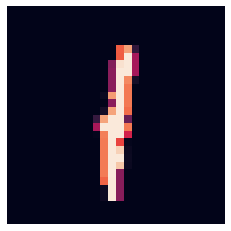

In [5]:
number = train.iloc[12][1:train.shape[1]]
number_matrix = number.values.reshape(28,28)
plt.imshow(number_matrix)
plt.axis('off');

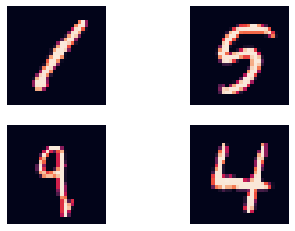

In [6]:
number = train.iloc[0][1:]
number_matrix =number.values.reshape(28,28)
plt.subplot(221)
plt.imshow(number_matrix)
plt.axis('off');
number = train.iloc[8][1:]
number_matrix =number.values.reshape(28,28)
plt.subplot(222)
plt.imshow(number_matrix)
plt.axis('off');
number = train.iloc[85][1:]
number_matrix =number.values.reshape(28,28)
plt.subplot(223)
plt.imshow(number_matrix)
plt.axis('off');
number = train.iloc[42][1:]
number_matrix =number.values.reshape(28,28)
plt.subplot(224)
plt.imshow(number_matrix)
plt.axis('off');

# Target construction & encoding the target to one hot vectors!

In [7]:
X = train.drop(['label'],axis=1) / 255
test = test/ 255
Y = train['label']
Y =  to_categorical(Y, num_classes = 10)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=42)

# Reshaping

In [9]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

# Looking at train and test images

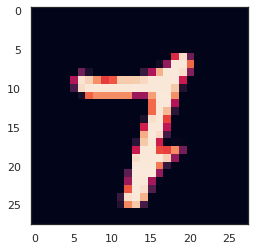

In [10]:
plt.imshow(X_train[0][:,:,0]);

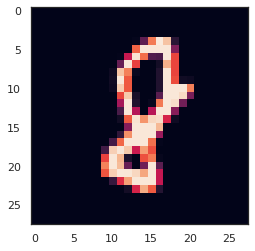

In [11]:
plt.imshow(X_test[0][:,:,0]);

# Defining the model!

In [12]:
model = Sequential()

## 2 layers with Conv2D - reLu is used to add non linearity to the network
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                activation='relu', input_shape=(28,28,1)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                activation='relu'))
## Max pool layer
model.add(MaxPool2D(pool_size=(2,2)))#downsampling filter

## Regularization - dropout layer
model.add(Dropout(0.25))#regularization method

# More Conv2D layers!
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                activation='relu'))

## Max pool layer
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#Strides of the convolution along the height and width
#downsampling filter

## Regularization - dropout layer
model.add(Dropout(0.25))#regularization method

# Flatten layer - Convert the it into a one single 1D vector
model.add(Flatten())

# Fully-connected (Dense) layers
model.add(Dense(256,activation='relu'))

## Regularization - dropout layer
model.add(Dropout(0.5))#regularization method

## last layer - Softmax: outputs distribution of probability of each class
model.add(Dense(10,activation='softmax'))

In [13]:
#Define the optimizer and compile the model!
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation  - Expanding our dataset (artificially)

In [14]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

# Model training - Fit

In [15]:
epochs = 30
batch_size = 88

In [16]:
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 8, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


# Evaluation

In [17]:
# Predict the values from the test dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, y_pred_classes) 
# print the confusion matrix
print(confusion_mtx)

[[1021    0    0    0    0    0    3    0    1    0]
 [   0 1142    0    0    0    0    1    3    0    0]
 [   1    0 1059    2    4    0    0    3    3    0]
 [   0    0    0 1148    0    0    0    0    2    1]
 [   0    1    0    0 1020    0    0    0    0    3]
 [   0    0    0    7    0  884    3    0    3    1]
 [   0    0    0    0    2    3 1005    0    0    0]
 [   0    1    3    0    1    0    0 1124    0    6]
 [   0    0    0    1    2    0    2    1  995    4]
 [   1    1    1    0    5    0    0    1    1 1024]]


In [18]:
print(classification_report(Y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1025
           1       1.00      1.00      1.00      1146
           2       1.00      0.99      0.99      1072
           3       0.99      1.00      0.99      1151
           4       0.99      1.00      0.99      1024
           5       1.00      0.98      0.99       898
           6       0.99      1.00      0.99      1010
           7       0.99      0.99      0.99      1135
           8       0.99      0.99      0.99      1005
           9       0.99      0.99      0.99      1034

    accuracy                           0.99     10500
   macro avg       0.99      0.99      0.99     10500
weighted avg       0.99      0.99      0.99     10500



# Let's predict the answer sheet

In [19]:
y_pred_answer = model.predict(test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred_answer,axis = 1) 

In [20]:
y_pred_classes[:5]

array([2, 0, 9, 0, 3])

In [21]:
answer = pd.read_csv('../data/digits/sample_submission.csv', sep=',')

In [22]:
answer['Label'] = y_pred_classes

In [23]:
answer.to_csv('../data/digits/submission.csv',index=False)

# Public Score: 0.99085 - 8 epochs, batch_size=86!
# Public Score: 0.99357 - 30 epochs - batch_size = 88!